In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import collections
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from grid_method import *
from model import GHH, GHH_01, GHH_10

In [3]:
def get_region_1d(grad):
    grad_n = grad.numpy()
    grad_n = grad_n.reshape(-1)
    sp = grad_n.shape
    grad_n = grad_n.astype(str)
    _, dist = np.unique(grad_n, return_inverse = True)
    dist = dist.reshape(sp)
    return dist

def arch_1(d, k, l):
    ghh1 = GHH(d,1,k)
    res = ghh1(d)
    
    for i in range(l-1):
        ghh = GHH(d,1,k)
        res = res.clone()
        res = ghh(res)
        
    output = res.clone()
    return output

def arch_1_01(d, k, l):
    ghh1 = GHH_01(d,1,k)
    res = ghh1(d)
    
    for i in range(l-1):
        ghh = GHH_01(d,1,k)
        res = res.clone()
        res = ghh(res)
        
    output = res.clone()
    return output

def arch_1_10(d, k, l):
    ghh1 = GHH_10(d,1,k)
    res = ghh1(d)
    
    for i in range(l-1):
        ghh = GHH_10(d,1,k)
        res = res.clone()
        res = ghh(res)
        
    output = res.clone()
    return output

In [4]:
def nb_region_arch1_01(ls, n_iter, window_size, nb, save_name1, save_name2):
    avg_nbs = []
    stds = []
    for l in ls:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d = torch.linspace(-1*window_size, window_size, nb)
            d = d.reshape(-1, 1)
            d.requires_grad_(True)
            output = arch_1_01(d, 3, l)
            output.backward(torch.ones_like(output))
            grad = d.grad.numpy().reshape(-1)
            
            stats[i,0] = len(set(grad))
        avg_nb = stats.mean(axis = 0)[0].item()
        std = stats.std(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        stds.append(std)
        print(f'{l}, finished.')
    # save the result
    avg_nbs_tosave = np.array(avg_nbs)
    stds_tosave = np.array(stds)
    np.save(save_name1, avg_nbs_tosave)
    np.save(save_name2, stds_tosave)
    return avg_nbs, stds

def nb_region_arch1_10(ls, n_iter, window_size, nb, save_name1, save_name2):
    avg_nbs = []
    stds = []
    for l in ls:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d = torch.linspace(-1*window_size, window_size, nb)
            d = d.reshape(-1, 1)
            d.requires_grad_(True)
            output = arch_1_10(d, 3, l)
            output.backward(torch.ones_like(output))
            grad = d.grad.numpy().reshape(-1)
            
            stats[i,0] = len(set(grad))
        avg_nb = stats.mean(axis = 0)[0].item()
        std = stats.std(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        stds.append(std)
        print(f'{l}, finished.')
    # save the result
    avg_nbs_tosave = np.array(avg_nbs)
    stds_tosave = np.array(stds)
    np.save(save_name1, avg_nbs_tosave)
    np.save(save_name2, stds_tosave)
    return avg_nbs, stds

In [7]:
# def. of the layers number
ls = np.arange(0,101,10)
ls[0] = 1
ls

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [42]:
nbs_01, stds_01 = nb_region_arch1_01(ls, 1000, 20, 2001, 'W10/data/nbs_05_20.npy', 'W10/data/stds_05_20.npy')

1, finished.
10, finished.
20, finished.
30, finished.
40, finished.
50, finished.
60, finished.
70, finished.
80, finished.
90, finished.
100, finished.


In [44]:
nbs_10, stds_10 = nb_region_arch1_10(ls, 1000, 20, 2001, 'W10/data/nbs_5_20.npy', 'W10/data/stds_5_20.npy')

1, finished.
10, finished.
20, finished.
30, finished.
40, finished.
50, finished.
60, finished.
70, finished.
80, finished.
90, finished.
100, finished.


In [43]:
nbs_01, stds_01 = nb_region_arch1_01(ls, 1000, 40, 4001, 'W10/data/nbs_05_40.npy', 'W10/data/stds_05_40.npy')

1, finished.
10, finished.
20, finished.
30, finished.
40, finished.
50, finished.
60, finished.
70, finished.
80, finished.
90, finished.
100, finished.


In [45]:
nbs_10, stds_10 = nb_region_arch1_10(ls, 1000, 40, 4001, 'W10/data/nbs_5_40.npy', 'W10/data/stds_5_40.npy')

1, finished.
10, finished.
20, finished.
30, finished.
40, finished.
50, finished.
60, finished.
70, finished.
80, finished.
90, finished.
100, finished.


In [3]:
nbs_01_20 = np.load('W10/data/nbs_01_20.npy') 
stds_01_20 = np.load('W10/data/stds_01_20.npy')

nbs_10_20 = np.load('W10/data/nbs_10_20.npy')
stds_10_20 = np.load('W10/data/stds_10_20.npy')

nbs_01_40 = np.load('W10/data/nbs_01_40.npy') 
stds_01_40 = np.load('W10/data/stds_01_40.npy')

nbs_10_40 = np.load('W10/data/nbs_10_40.npy')
stds_10_40 = np.load('W10/data/stds_10_40.npy')

nbs_05_20 = np.load('W10/data/nbs_05_20.npy') 
stds_05_20 = np.load('W10/data/stds_05_20.npy')

nbs_5_20 = np.load('W10/data/nbs_5_20.npy')
stds_5_20 = np.load('W10/data/stds_5_20.npy')

nbs_05_40 = np.load('W10/data/nbs_05_40.npy') 
stds_05_40 = np.load('W10/data/stds_05_40.npy')

nbs_5_40 = np.load('W10/data/nbs_5_40.npy')
stds_5_40 = np.load('W10/data/stds_5_40.npy')

In [4]:
nbs_40 = np.load('data/arch1_nbs_w40.npy')
stds_40 = np.load('data/arch1_stds_w40.npy')

nbs_20 = np.load('data/arch1_nbs_w20.npy')
stds_20 = np.load('data/arch1_stds_w20.npy')

In [5]:
nbs_01_20_upp = nbs_01_20 + stds_01_20
nbs_01_20_low = nbs_01_20 - stds_01_20

nbs_10_20_upp = nbs_10_20 + stds_10_20
nbs_10_20_low = nbs_10_20 - stds_10_20

nbs_01_40_upp = nbs_01_40 + stds_01_40
nbs_01_40_low = nbs_01_40 - stds_01_40

nbs_10_40_upp = nbs_10_40 + stds_10_40
nbs_10_40_low = nbs_10_40 - stds_10_40

nbs_05_20_upp = nbs_05_20 + stds_05_20
nbs_05_20_low = nbs_05_20 - stds_05_20

nbs_5_20_upp = nbs_5_20 + stds_5_20
nbs_5_20_low = nbs_5_20 - stds_5_20

nbs_05_40_upp = nbs_05_40 + stds_05_40
nbs_05_40_low = nbs_05_40 - stds_05_40

nbs_5_40_upp = nbs_5_40 + stds_5_40
nbs_5_40_low = nbs_5_40 - stds_5_40

nbs_20_upp = nbs_20 + stds_20
nbs_20_low = nbs_20 - stds_20

nbs_40_upp = nbs_40 + stds_40
nbs_40_low = nbs_40 - stds_40

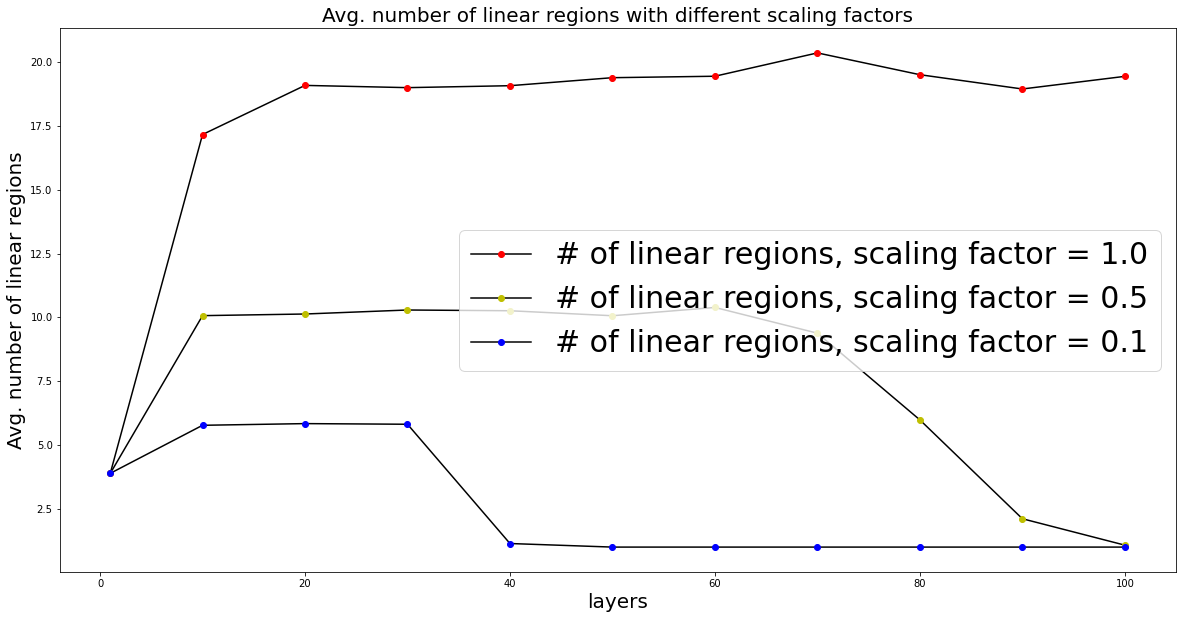

In [8]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls,nbs_20,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of linear regions, scaling factor = 1.0')
#plt.fill_between(ls, nbs_20_upp, nbs_20_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers",fontsize=20)
plt.ylabel("Avg. number of linear regions",fontsize=20)
plt.title("Avg. number of linear regions with different scaling factors",fontsize=20)

#add the figure of scaling 0.1


# # add the figure of scaling 10
# plt.plot(ls,nbs_10_20,'k-',marker = 'o',mfc = 'g', mec = 'g', label = '# of linear regions, scaling factor = 10.0')
# plt.fill_between(ls, nbs_10_20_upp, nbs_10_20_low, color='green', alpha= 0.1)
# plt.legend()

#add the figure of scaling 0.5
plt.plot(ls,nbs_05_20,'k-',marker = 'o',mfc = 'y', mec = 'y', label = '# of linear regions, scaling factor = 0.5')
#plt.fill_between(ls, nbs_05_20_upp, nbs_05_20_low, color='yellow', alpha = 0.1)
plt.legend()

plt.plot(ls,nbs_01_20,'k-',marker = 'o',mfc = 'b', mec = 'b', label = '# of linear regions, scaling factor = 0.1')
#plt.fill_between(ls, nbs_01_20_upp, nbs_01_20_low, color='blue', alpha = 0.1)
plt.legend(prop={'size': 30})

# #add the figure of scaling 5
# plt.plot(ls,nbs_5_20,'k-',marker = 'o',mfc = 'm', mec = 'm', label = '# of linear regions, scaling factor = 5')
# plt.fill_between(ls, nbs_5_20_upp, nbs_5_20_low, color='magenta', alpha = 0.1)
# plt.legend()

#plt.savefig('Report/scaling_small.jpg')
plt.show()

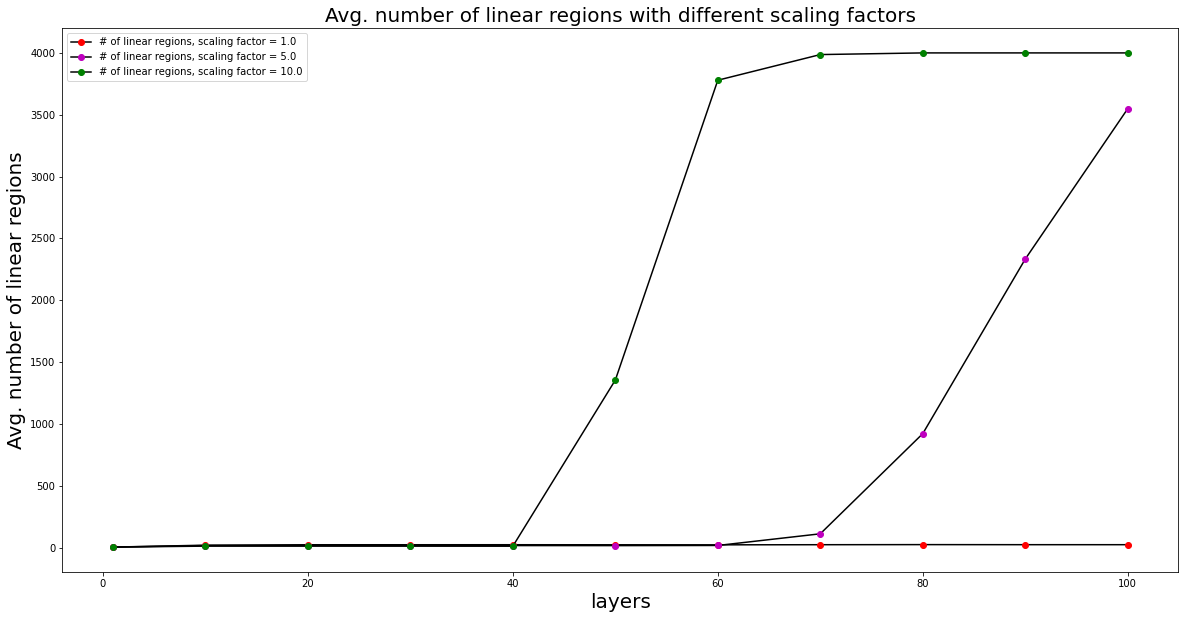

In [13]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls,nbs_40,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of linear regions, scaling factor = 1.0')
#plt.fill_between(ls, nbs_40_upp, nbs_40_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers",fontsize=20)
plt.ylabel("Avg. number of linear regions",fontsize=20)
plt.title("Avg. number of linear regions with different scaling factors",fontsize=20)

# #add the figure of scaling 0.1
# plt.plot(ls,nbs_01_40,'k-',marker = 'o',mfc = 'b', mec = 'b', label = '# of linear regions, scaling factor = 0.1')
# plt.fill_between(ls, nbs_01_40_upp, nbs_01_40_low, color='blue', alpha = 0.1)
# plt.legend()
#add the figure of scaling 5
plt.plot(ls,nbs_5_40,'k-',marker = 'o',mfc = 'm', mec = 'm', label = '# of linear regions, scaling factor = 5.0')
#plt.fill_between(ls, nbs_5_40_upp, nbs_5_40_low, color='magenta', alpha = 0.1)
plt.legend()


# add the figure of scaling 10
plt.plot(ls,nbs_10_40,'k-',marker = 'o',mfc = 'g', mec = 'g', label = '# of linear regions, scaling factor = 10.0')
#plt.fill_between(ls, nbs_10_40_upp, nbs_10_40_low, color='green', alpha= 0.1)
plt.legend()

# #add the figure of scaling 0.5
# plt.plot(ls,nbs_05_40,'k-',marker = 'o',mfc = 'y', mec = 'y', label = '# of linear regions, scaling factor = 0.5')
# plt.fill_between(ls, nbs_05_40_upp, nbs_05_40_low, color='yellow', alpha = 0.1)
# plt.legend()

plt.savefig('Report/Scaling_factor-large.jpg')

plt.show()

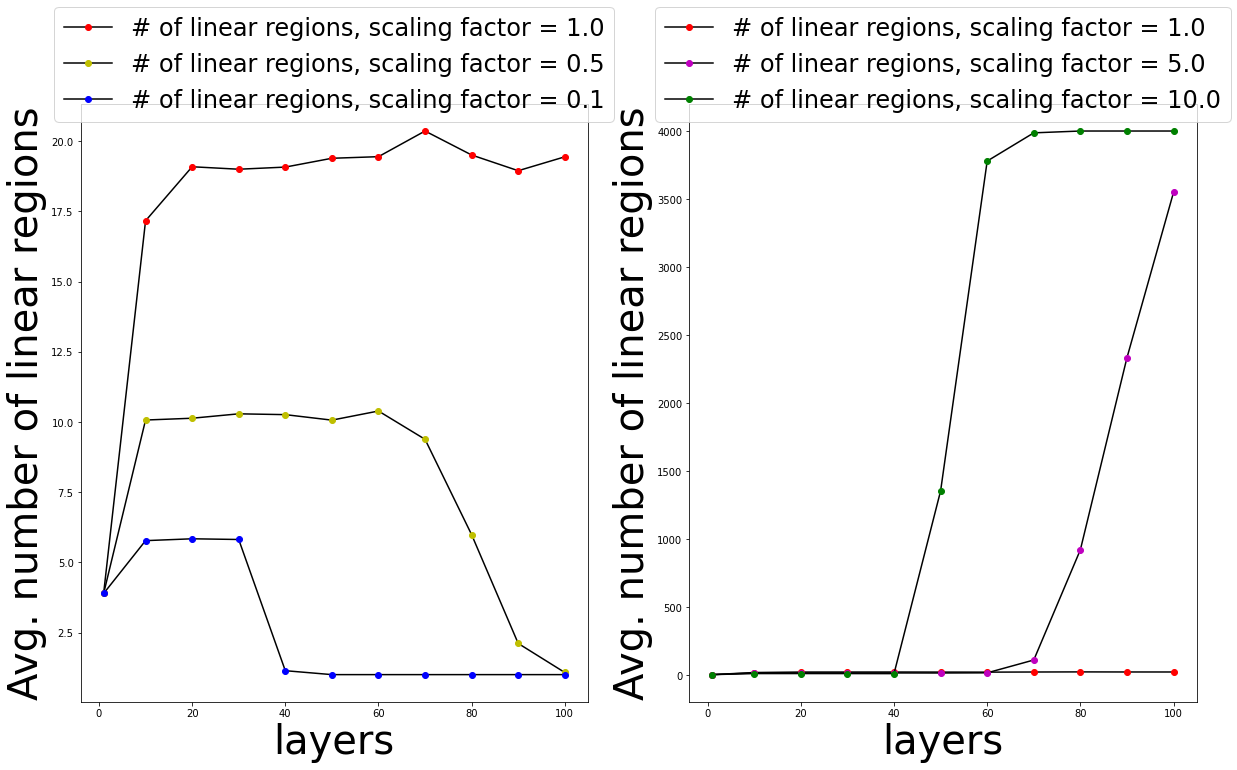

In [27]:
fig = plt.figure(figsize=(20,11))

plt.subplot(121)
plt.plot(ls,nbs_20,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of linear regions, scaling factor = 1.0')
#plt.fill_between(ls, nbs_20_upp, nbs_20_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers",fontsize=40)
plt.ylabel("Avg. number of linear regions",fontsize=40)
#plt.title("Avg. number of linear regions with smaller scaling factors",fontsize=20)

#add the figure of scaling 0.1


# # add the figure of scaling 10
# plt.plot(ls,nbs_10_20,'k-',marker = 'o',mfc = 'g', mec = 'g', label = '# of linear regions, scaling factor = 10.0')
# plt.fill_between(ls, nbs_10_20_upp, nbs_10_20_low, color='green', alpha= 0.1)
# plt.legend()

#add the figure of scaling 0.5
plt.plot(ls,nbs_05_20,'k-',marker = 'o',mfc = 'y', mec = 'y', label = '# of linear regions, scaling factor = 0.5')
#plt.fill_between(ls, nbs_05_20_upp, nbs_05_20_low, color='yellow', alpha = 0.1)
plt.legend()

plt.plot(ls,nbs_01_20,'k-',marker = 'o',mfc = 'b', mec = 'b', label = '# of linear regions, scaling factor = 0.1')
#plt.fill_between(ls, nbs_01_20_upp, nbs_01_20_low, color='blue', alpha = 0.1)
plt.legend(bbox_to_anchor=(0.5, 0.95),loc=8, prop={'size': 24})

# #add the figure of scaling 5
# plt.plot(ls,nbs_5_20,'k-',marker = 'o',mfc = 'm', mec = 'm', label = '# of linear regions, scaling factor = 5')
# plt.fill_between(ls, nbs_5_20_upp, nbs_5_20_low, color='magenta', alpha = 0.1)
# plt.legend()


plt.subplot(122)
plt.plot(ls,nbs_40,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of linear regions, scaling factor = 1.0')
#plt.fill_between(ls, nbs_40_upp, nbs_40_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers",fontsize=40)
plt.ylabel("Avg. number of linear regions",fontsize=40)
#plt.title("Avg. number of linear regions with larger scaling factors",fontsize=20)

# #add the figure of scaling 0.1
# plt.plot(ls,nbs_01_40,'k-',marker = 'o',mfc = 'b', mec = 'b', label = '# of linear regions, scaling factor = 0.1')
# plt.fill_between(ls, nbs_01_40_upp, nbs_01_40_low, color='blue', alpha = 0.1)
# plt.legend()
#add the figure of scaling 5
plt.plot(ls,nbs_5_40,'k-',marker = 'o',mfc = 'm', mec = 'm', label = '# of linear regions, scaling factor = 5.0')
#plt.fill_between(ls, nbs_5_40_upp, nbs_5_40_low, color='magenta', alpha = 0.1)
plt.legend()


# add the figure of scaling 10
plt.plot(ls,nbs_10_40,'k-',marker = 'o',mfc = 'g', mec = 'g', label = '# of linear regions, scaling factor = 10.0')
#plt.fill_between(ls, nbs_10_40_upp, nbs_10_40_low, color='green', alpha= 0.1)
plt.legend(bbox_to_anchor=(0.5, 0.95),loc=8, prop={'size': 24})

# #add the figure of scaling 0.5
# plt.plot(ls,nbs_05_40,'k-',marker = 'o',mfc = 'y', mec = 'y', label = '# of linear regions, scaling factor = 0.5')
# plt.fill_between(ls, nbs_05_40_upp, nbs_05_40_low, color='yellow', alpha = 0.1)
# plt.legend()

plt.savefig('Report/Scaling_factor.jpg')

plt.show()

In [15]:
d = torch.linspace(-40, 40,4001)
d = d.reshape(-1, 1)
d.requires_grad_(True)
output = arch_1_01(d, 3, 100)
output.backward(torch.ones_like(output))
grad = d.grad.numpy().reshape(-1)

In [16]:
output

tensor([[-0.1125],
        [-0.1125],
        [-0.1125],
        ...,
        [-0.1125],
        [-0.1125],
        [-0.1125]], grad_fn=<CloneBackward>)

In [17]:
np.sum(grad==0.)

4001

In [42]:
d = torch.linspace(-40, 40,8001)
d = d.reshape(-1, 1)
d.requires_grad_(True)
output = arch_1(d, 3, 140)
output.backward(torch.ones_like(output))
grad = d.grad.numpy().reshape(-1)

In [43]:
np.sum(grad==0.0)

131

In [26]:
grad

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [27]:
len(set(grad))

1